In [328]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [329]:
Ab_de_villiers='AB-de-Villiers-All-International-Cricket-Centuries - Copy.csv'
df=pd.read_csv(Ab_de_villiers)
df

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,109,England,1,3,"SuperSport Park, Centurion",Home,21-Jan-05,Drawn
1,2,178,West Indies,2,2,"Kensington Oval, Bridgetown",Away,21-Apr-05,Won
2,3,114,West Indies,1,1,"Antigua Recreation Ground, St John's",Away,29-Apr-05,Drawn
3,4,146,West Indies,1,1,"National Cricket Stadium, St George's",Away,10-Apr-07,Won
4,5,107,Zimbabwe,4,1,"Harare Sports Club, Harare",Away,26-Aug-07,Won
5,6,103*,Pakistan,4,1,"Gaddafi Stadium, Lahore",Away,18-Oct-07,Won
6,7,103*,West Indies,6,2,"Kingsmead Cricket Ground, Durban",Home,10-Jan-08,Won
7,8,217*,India,6,2,"Sardar Patel Stadium, Ahmedabad",Away,03-Apr-08,Won
8,9,174,England,6,2,"Headingley, Leeds",Away,18-Jul-08,Won
9,10,106*,Australia,5,4,"WACA Ground, Perth",Away,17-Dec-08,Won


In [330]:
#To check datatypes of columns
df.dtypes


No.          int64
Score       object
Against     object
Position     int64
Innings      int64
Venue       object
Ground      object
Date        object
Result      object
dtype: object

In [331]:
df.shape

(47, 9)

In [332]:
df.describe()

,No.,Position,Innings
count,47.000000,47.000000,47.000000
mean,24.000000,4.297872,1.617021
std,13.711309,1.266884,0.795454
min,1.000000,1.000000,1.000000
25%,12.500000,4.000000,1.000000
50%,24.000000,5.000000,1.000000
75%,35.500000,5.000000,2.000000
max,47.000000,6.000000,4.000000


In [333]:
#Create New columns which contains boolean function
df['Out/Not-Out']=df['Score'].str.contains(r'[^\w\s]', regex=True)
df.loc[df['Out/Not-Out'] == True, 'Out/Not-Out'] = 'Not Out' 
df.loc[df['Out/Not-Out'] == False, 'Out/Not-Out'] = 'Out'

C:\Users\HP\AppData\Local\Temp\ipykernel_11212\1411070440.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not Out' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Out/Not-Out'] == True, 'Out/Not-Out'] = 'Not Out'


In [358]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Score,Against,Position,Innings,Ground,Date,Result,Out/Not-Out,Year,Ground_Name,City
0,109,England,1,3,Home,2005-01-21,Drawn,Out,2005,SuperSport Park,Centurion
1,178,West Indies,2,2,Away,2005-04-21,Won,Out,2005,Kensington Oval,Bridgetown
2,114,West Indies,1,1,Away,2005-04-29,Drawn,Out,2005,Antigua Recreation Ground,St John's
3,146,West Indies,1,1,Away,2007-04-10,Won,Out,2007,National Cricket Stadium,St George's
4,107,Zimbabwe,4,1,Away,2007-08-26,Won,Out,2007,Harare Sports Club,Harare


In [335]:
df['Year']=df['Date'].dt.year

In [336]:
# Removing '*' from Score column
df['Score'] = df['Score'].str.replace('*', '')
df.head(15)

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,Out/Not-Out,Year
0,1,109,England,1,3,"SuperSport Park, Centurion",Home,2005-01-21,Drawn,Out,2005
1,2,178,West Indies,2,2,"Kensington Oval, Bridgetown",Away,2005-04-21,Won,Out,2005
2,3,114,West Indies,1,1,"Antigua Recreation Ground, St John's",Away,2005-04-29,Drawn,Out,2005
3,4,146,West Indies,1,1,"National Cricket Stadium, St George's",Away,2007-04-10,Won,Out,2007
4,5,107,Zimbabwe,4,1,"Harare Sports Club, Harare",Away,2007-08-26,Won,Out,2007
5,6,103,Pakistan,4,1,"Gaddafi Stadium, Lahore",Away,2007-10-18,Won,Not Out,2007
6,7,103,West Indies,6,2,"Kingsmead Cricket Ground, Durban",Home,2008-01-10,Won,Not Out,2008
7,8,217,India,6,2,"Sardar Patel Stadium, Ahmedabad",Away,2008-04-03,Won,Not Out,2008
8,9,174,England,6,2,"Headingley, Leeds",Away,2008-07-18,Won,Out,2008
9,10,106,Australia,5,4,"WACA Ground, Perth",Away,2008-12-17,Won,Not Out,2008


In [337]:
#Change data type of Score's column to int datatype
df=df.astype({'Score':'int64'})

In [338]:
#Add Two New Coloumns
df[['Ground_Name', 'City']]=df['Venue'].str.split(', ', expand=True)[[0,1]]

In [339]:
#Drop column 'No.' and 'Venue'from dataset
df.drop(columns='No.', inplace=True)
df.drop(columns='Venue', inplace=True)

In [340]:
df.tail()

,Score,Against,Position,Innings,Ground,Date,Result,Out/Not-Out,Year,Ground_Name,City
42,112,India,4,2,Away,2015-10-22,Lost,Out,2015,M. A. Chidambaram Stadium,Chennai
43,119,India,4,1,Away,2015-10-25,Won,Out,2015,Wankhede Stadium,Mumbai
44,101,England,5,2,Home,2016-02-14,Won,Not Out,2016,Newlands Cricket Ground,Cape Town
45,176,Bangladesh,4,1,Home,2017-10-18,Won,Out,2017,Boland Park,Paarl
46,126,Australia,5,2,Home,2018-03-09,Won,Not Out,2018,St George's Park,Port Elizabeth


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Score        47 non-null     int64         
 1   Against      47 non-null     object        
 2   Position     47 non-null     int64         
 3   Innings      47 non-null     int64         
 4   Ground       47 non-null     object        
 5   Date         47 non-null     datetime64[ns]
 6   Result       47 non-null     object        
 7   Out/Not-Out  47 non-null     object        
 8   Year         47 non-null     int32         
 9   Ground_Name  47 non-null     object        
 10  City         47 non-null     object        
dtypes: datetime64[ns](1), int32(1), int64(3), object(6)
memory usage: 4.0+ KB


In [342]:
# To check Null value
df.isnull().sum()

Score          0
Against        0
Position       0
Innings        0
Ground         0
Date           0
Result         0
Out/Not-Out    0
Year           0
Ground_Name    0
City           0
dtype: int64

In [343]:
# Check Duplicated Rows
df.duplicated().sum()

0

In [344]:
df.nunique()

Score          35
Against        10
Position        6
Innings         4
Ground          3
Date           47
Result          5
Out/Not-Out     2
Year           13
Ground_Name    30
City           31
dtype: int64

In [345]:
df.Score.unique()

array([109, 178, 114, 146, 107, 103, 217, 174, 106, 104, 163, 121, 102,
       135, 101, 278, 129, 134, 160, 125, 169, 128, 164, 115, 116, 108,
       136, 152, 148, 149, 162, 112, 119, 176, 126], dtype=int64)

#### Data Analysis of Score with Date

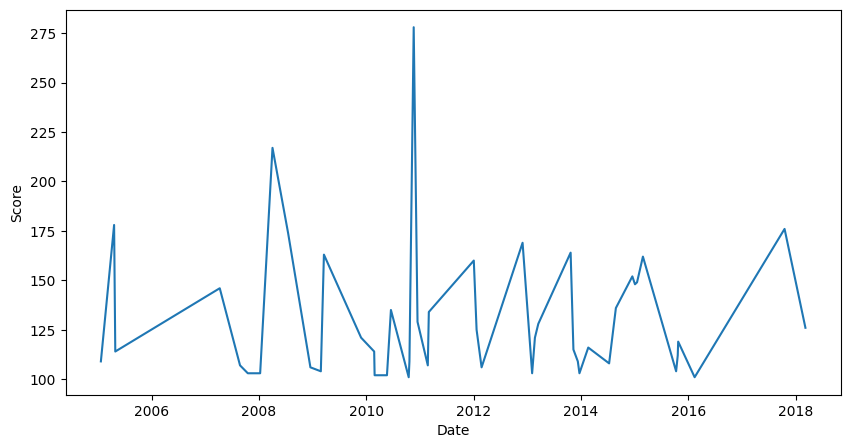

In [346]:
plt.figure(figsize=(10,5))
df1=sns.lineplot(data=df, y='Score', x='Date')

<Axes: ylabel='Score'>

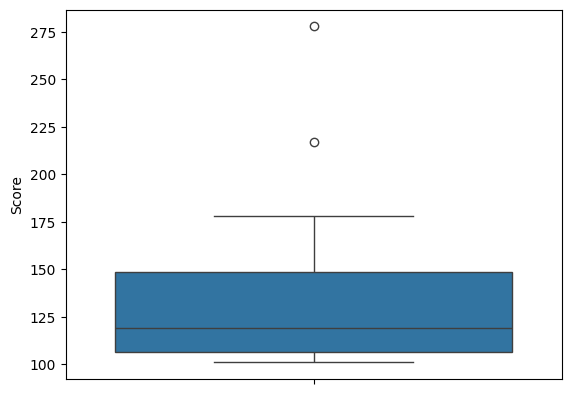

In [347]:
sns.boxplot(data=df, y='Score')

C:\Users\HP\AppData\Local\Temp\ipykernel_11212\1977149036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_grouped, x='Year', y='Score', palette='Set1')


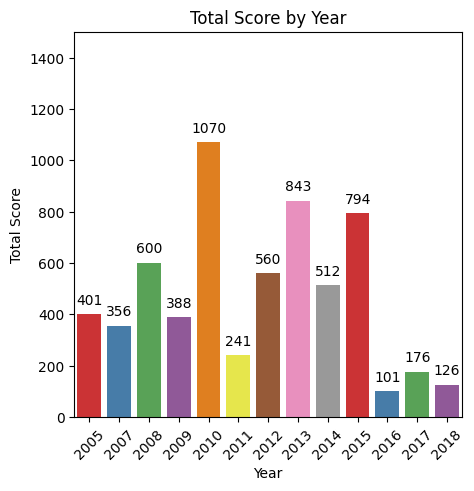

In [348]:
df_grouped = df.groupby(['Year'], as_index=False)['Score'].sum().sort_values(by='Score', ascending=False)

plt.figure(figsize=(5, 5))
ax=sns.barplot(data=df_grouped, x='Year', y='Score', palette='Set1')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.title('Total Score by Year')
plt.ylim(0,1500)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11212\527197797.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df1=sns.countplot(data=df,x="Against",order=df["Against"].value_counts().index, palette = "Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' West Indies'),
  Text(1, 0, ' India'),
  Text(2, 0, ' Pakistan'),
  Text(3, 0, ' Australia'),
  Text(4, 0, ' England'),
  Text(5, 0, ' Zimbabwe'),
  Text(6, 0, ' Sri Lanka'),
  Text(7, 0, ' Netherlands'),
  Text(8, 0, ' New Zealand'),
  Text(9, 0, ' Bangladesh')])

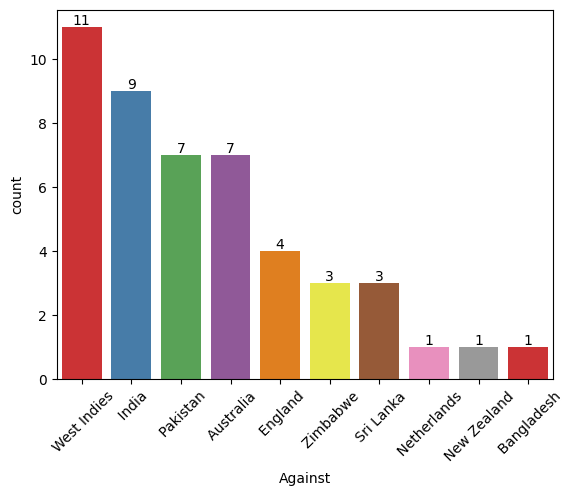

In [349]:
df1=sns.countplot(data=df,x="Against",order=df["Against"].value_counts().index, palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' England'),
  Text(1, 0, ' West Indies'),
  Text(2, 0, ' Zimbabwe'),
  Text(3, 0, ' Pakistan'),
  Text(4, 0, ' India'),
  Text(5, 0, ' Australia'),
  Text(6, 0, ' Netherlands'),
  Text(7, 0, ' Sri Lanka'),
  Text(8, 0, ' New Zealand'),
  Text(9, 0, ' Bangladesh')])

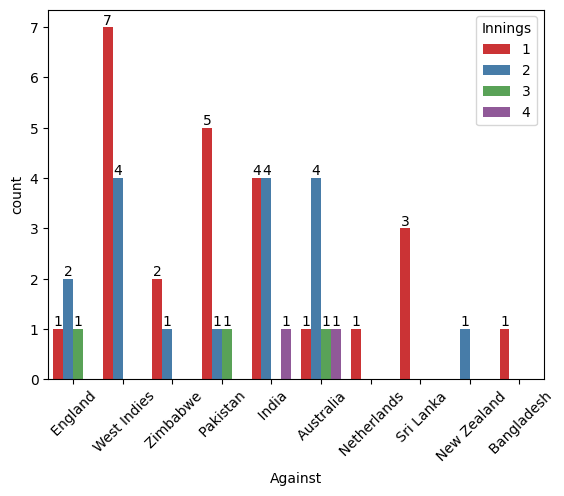

In [350]:
df1=sns.countplot(data=df,x="Against",hue="Innings", palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)
plt.xticks(rotation=45)

C:\Users\HP\AppData\Local\Temp\ipykernel_11212\542907437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df1=sns.countplot(data=df,x="Position", order=df['Position'].value_counts().index, palette = "Set1")


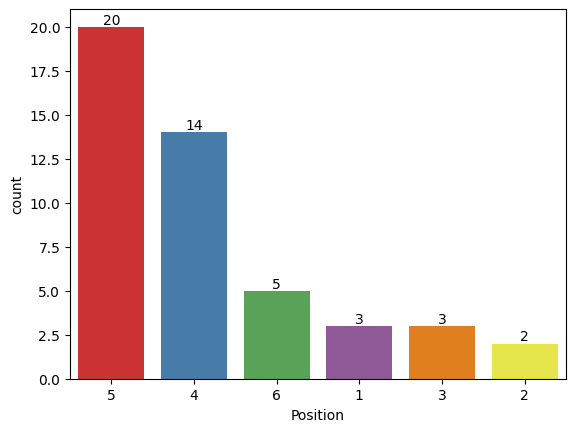

In [351]:
df1=sns.countplot(data=df,x="Position", order=df['Position'].value_counts().index, palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' England'),
  Text(1, 0, ' West Indies'),
  Text(2, 0, ' Zimbabwe'),
  Text(3, 0, ' Pakistan'),
  Text(4, 0, ' India'),
  Text(5, 0, ' Australia'),
  Text(6, 0, ' Netherlands'),
  Text(7, 0, ' Sri Lanka'),
  Text(8, 0, ' New Zealand'),
  Text(9, 0, ' Bangladesh')])

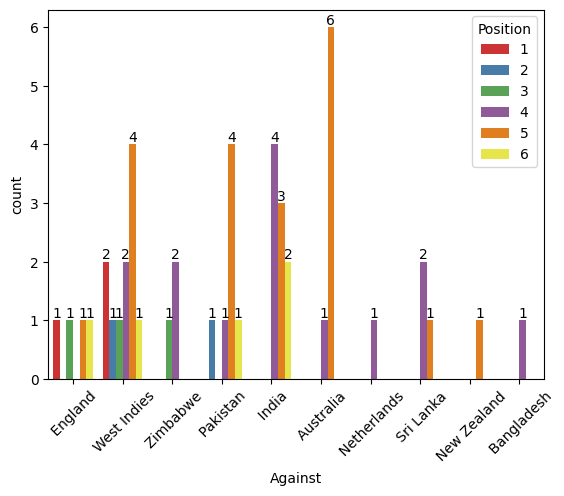

In [352]:
df1=sns.countplot(data=df,x="Against",hue="Position", palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)
plt.xticks(rotation=45)

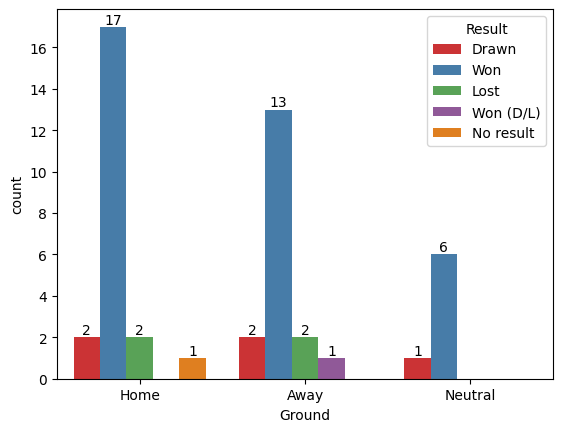

In [353]:
df1=sns.countplot(data=df,x="Ground", hue='Result', palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)


([0], [Text(0, 0, '')])

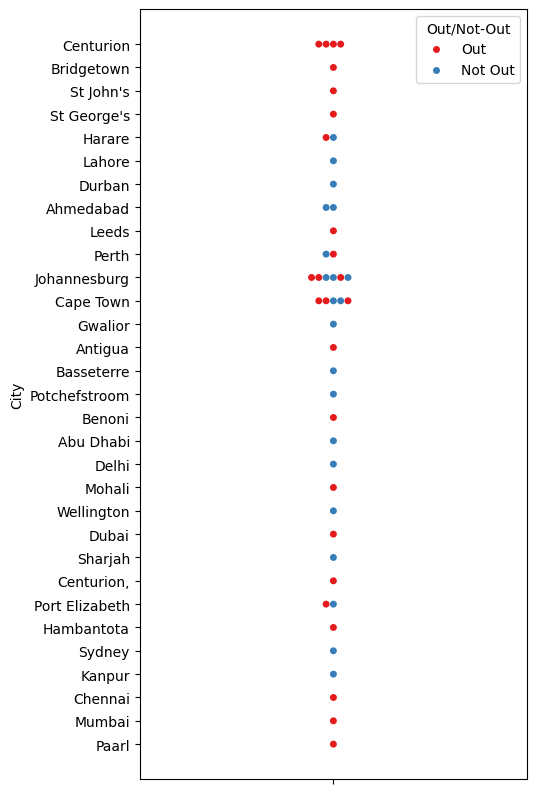

In [354]:
plt.figure(figsize=(5,10))
df1=sns.swarmplot(data=df,y="City", hue='Out/Not-Out', palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' England'),
  Text(1, 0, ' West Indies'),
  Text(2, 0, ' Zimbabwe'),
  Text(3, 0, ' Pakistan'),
  Text(4, 0, ' India'),
  Text(5, 0, ' Australia'),
  Text(6, 0, ' Netherlands'),
  Text(7, 0, ' Sri Lanka'),
  Text(8, 0, ' New Zealand'),
  Text(9, 0, ' Bangladesh')])

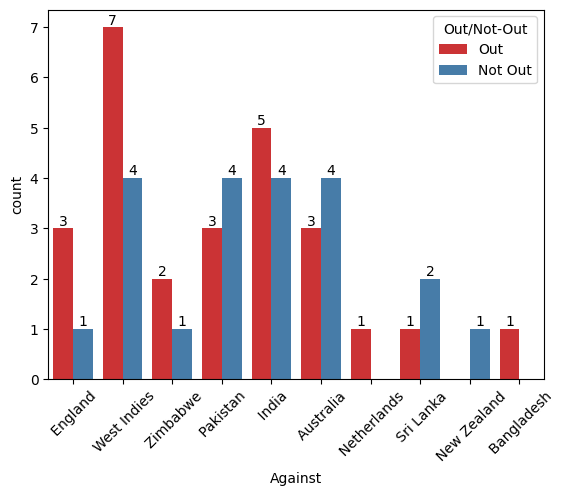

In [355]:
df1=sns.countplot(data=df,x="Against", hue='Out/Not-Out', palette = "Set1")
for p in df1.containers:
    df1.bar_label(p)
plt.xticks(rotation=45)


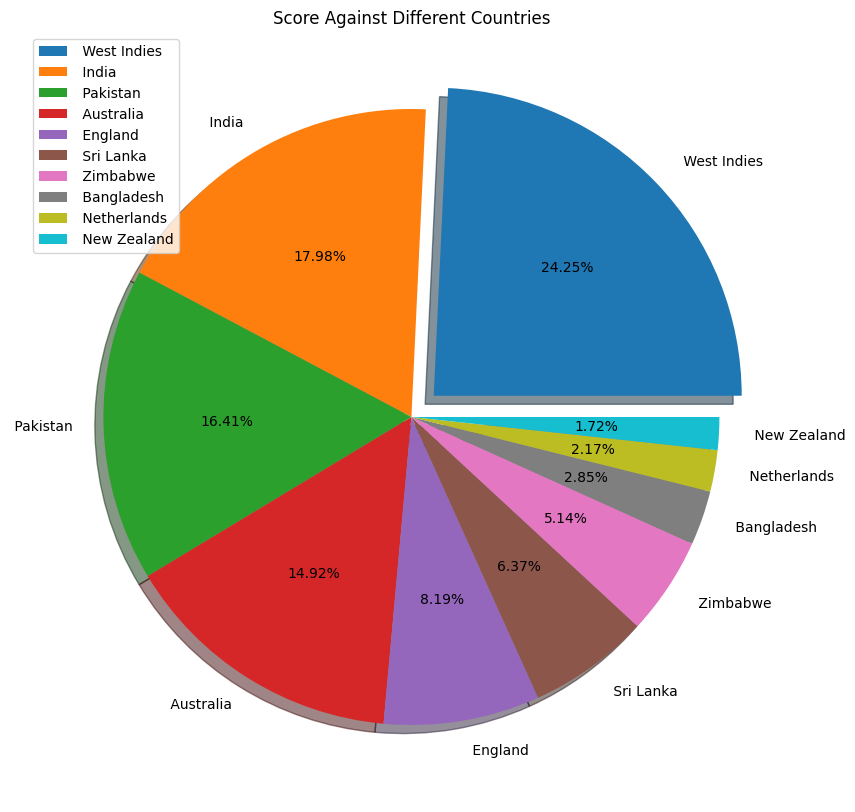

In [356]:
df1=df.groupby(['Against'], as_index=False)['Score'].sum().sort_values(by="Score", ascending=False)
plt.figure(figsize=(10,10))
against = df1['Against']
runs = df1['Score']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(runs, labels=against, autopct="%1.2f%%",shadow=True, explode=explode)
plt.title('Score Against Different Countries')
plt.legend()
plt.show()

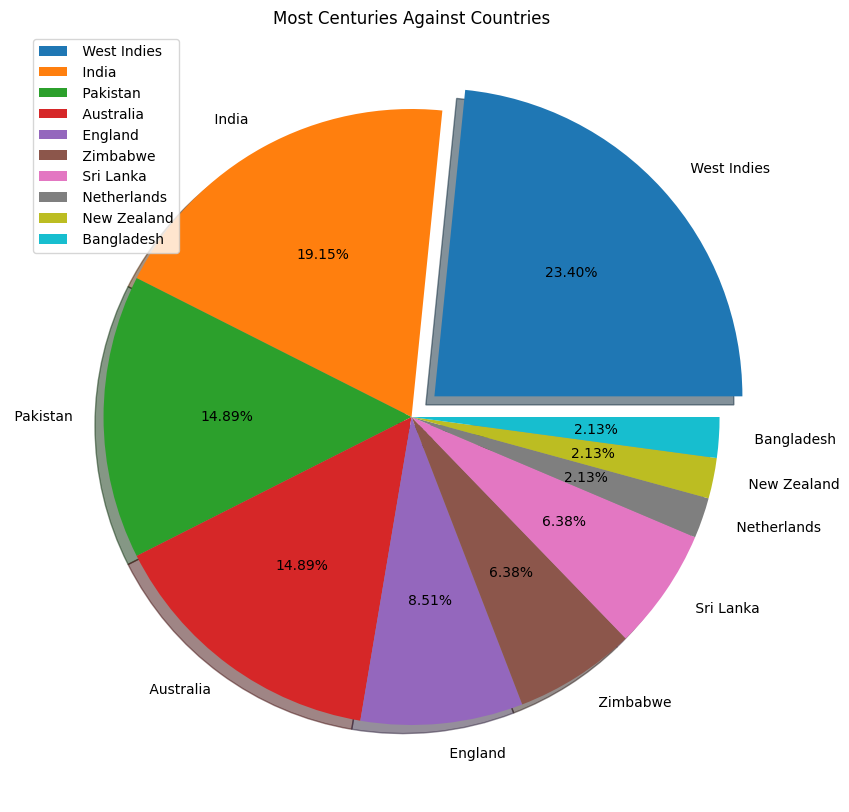

In [357]:
label = df['Against'].value_counts()
plt.figure(figsize = (20,10))
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(label, labels=label.index, autopct='%1.2f%%',shadow =True, explode=explode)
plt.title('Most Centuries Against Countries')
plt.legend()
plt.show()
